Preprocesamiento de datos

In [11]:
### importacion de librerias

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
# carga de datos

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('datasets/data.csv')

In [13]:
# función que calcule la categoría de edad

def assing_age_range(age):
    if age < 0 or pd.isna(age):
        return 'NA'
    elif age < 20:
        return '0-19'
    elif age < 40:
        return '20-39'
    elif age < 60:
        return '40-59'
    elif age >= 60:
        return '60+'


In [14]:
data['age_group'] = data['age'].apply(assing_age_range)

# creamos una columna nueva con el salario total

data['total_salary'] = data['basePay'] + data['bonus']



In [15]:
# función que calcule la categoría de ingresos

def total_salary_range(salary):
    if salary < 40000 or pd.isna(salary):
        return '< 40,000'
    elif salary < 80001:
        return '40,000-80,000'
    elif salary < 120001:
        return '80,001-120,000'
    elif salary < 160001:
        return '120,001-160,000'
    elif salary >= 160001:
        return '> 160,000'

In [16]:
data['total_salary_range'] = data['total_salary'].apply(total_salary_range)

In [17]:
data.head()

,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus,age_group,total_salary,total_salary_range
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,0-19,52301,"40,000-80,000"
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,20-39,119604,"80,001-120,000"
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,0-19,99476,"80,001-120,000"
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,20-39,118234,"80,001-120,000"
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,20-39,108783,"80,001-120,000"


In [18]:

encoder = ColumnTransformer(
    [('encoder', OrdinalEncoder(), ['jobTitle', 'gender','edu','dept','age_group','total_salary_range'])],
    remainder='passthrough'
)

data_encoded = encoder.fit_transform(data)

encoder_categories = encoder.named_transformers_['encoder'].categories_

print("\nCategorías asignadas:")
for i, categories in enumerate(encoder_categories):
    print(f"Variable {i}: {dict(zip(categories, range(len(categories))))}")



Categorías asignadas:
Variable 0: {'Data Scientist': 0, 'Driver': 1, 'Financial Analyst': 2, 'Graphic Designer': 3, 'IT': 4, 'Manager': 5, 'Marketing Associate': 6, 'Sales Associate': 7, 'Software Engineer': 8, 'Warehouse Associate': 9}
Variable 1: {'Female': 0, 'Male': 1}
Variable 2: {'College': 0, 'High School': 1, 'Masters': 2, 'PhD': 3}
Variable 3: {'Administration': 0, 'Engineering': 1, 'Management': 2, 'Operations': 3, 'Sales': 4}
Variable 4: {'0-19': 0, '20-39': 1, '40-59': 2, '60+': 3}
Variable 5: {'120,001-160,000': 0, '40,000-80,000': 1, '80,001-120,000': 2, '> 160,000': 3}


In [19]:
data_encoded = pd.DataFrame(data_encoded)

data_encoded = (
    data_encoded
    .rename(columns={0:'job_title',1:'gender',3:'perf_eval',4:'edu',5:'dept',6:'seniority',9:'age_group',11:'total_salary_range'})
    .drop(columns={2,7,8,10})
)
data_encoded.head()

,job_title,gender,perf_eval,edu,dept,seniority,age_group,total_salary_range
0,3.0,0.0,3.0,0.0,1.0,18.0,42363.0,52301.0
1,8.0,1.0,2.0,1.0,2.0,21.0,108476.0,119604.0
2,9.0,0.0,0.0,0.0,2.0,19.0,90208.0,99476.0
3,8.0,1.0,4.0,1.0,2.0,20.0,108080.0,118234.0
4,3.0,1.0,1.0,1.0,2.0,26.0,99464.0,108783.0


In [20]:
# es necesario escalar las caracteristicas ?

numeric = ['job_title', 'gender', 'perf_eval', 'edu','dept','seniority','age_group','total_salary_range']

scaler = StandardScaler()
scaler.fit(data_encoded[numeric])
data_encoded[numeric] = scaler.transform(data_encoded[numeric])


print(data_encoded.head()) 

   job_title    gender  perf_eval       edu      dept  seniority  age_group  \
0  -0.516318 -1.066186   0.674599 -2.099332 -0.490361  -1.637282  -2.057651   
1   1.226822  0.937923  -0.032528 -0.800240  0.723403  -1.427311   0.552949   
2   1.575450 -1.066186  -1.446782 -2.099332  0.723403  -1.567291  -0.168398   
3   1.226822  0.937923   1.381727 -0.800240  0.723403  -1.497301   0.537313   
4  -0.516318  0.937923  -0.739655 -0.800240  0.723403  -1.077360   0.197093   

   total_salary_range  
0           -1.934409  
1            0.742291  
2           -0.058217  
3            0.687805  
4            0.311930  


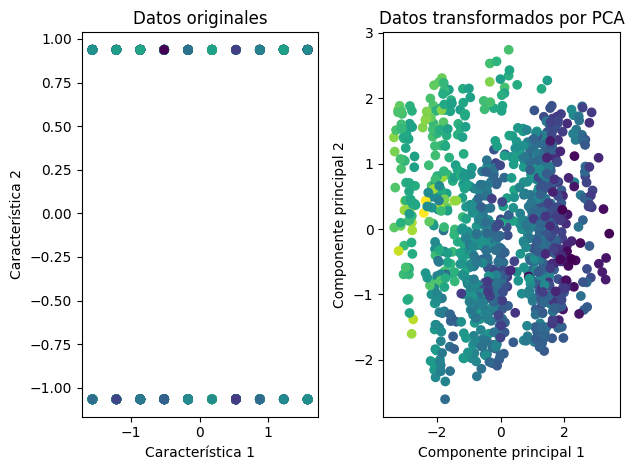

In [22]:

### esto debe aplicarse despues de crear las etiquetas con el clusterizado


X = data_encoded.iloc[:, :-1].values
y = data_encoded.iloc[:, -1].values

# Crea una instancia de PCA con 2 componentes
pca = PCA(n_components=2)

# Ajusta el modelo de PCA a tus características
X_pca = pca.fit_transform(X)

# Grafica tus datos originales y transformados
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Datos originales')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Datos transformados por PCA')

plt.tight_layout()
plt.show()